

# Regressão Linear



## 5.37.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def regressao(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerador = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x)))
    denominador = sum((x[i] - x_mean) ** 2 for i in range(len(x)))

    b = numerador / denominador
    a = y_mean - b * x_mean

    return a, b

def r(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerador = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x)))
    denominador = np.sqrt(
        sum((x[i] - x_mean) ** 2 for i in range(len(x))) *
        sum((y[i] - y_mean) ** 2 for i in range(len(y)))
    )

    r = numerador / denominador
    return r




In [ ]:
x = [71, 68, 66, 67, 70, 71, 70, 73, 72, 65, 66, 70]
y = [69, 64, 65, 63, 65, 62, 65, 64, 66, 59, 62, 64]

print(regressao(x, y))
print(r(x,y))

(np.float64(28.036707452725246), np.float64(0.5205784204671858))
0.5546300759832226


### 5.38.

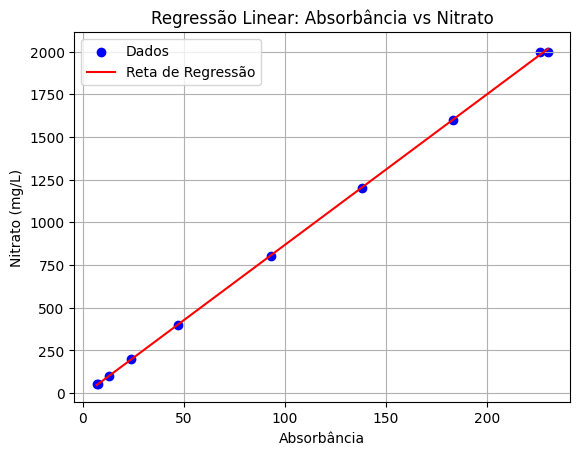

In [ ]:
nitratos = np.array([50, 50, 100, 200, 400, 800, 1200, 1600, 2000, 2000])
absorbancia = np.array([7.0, 7.5, 12.8, 24.0, 47.0, 93.0, 138.0, 183.0, 230.0, 226.0])

a_nitrato, b_nitrato = regressao(absorbancia, nitratos)
r_nitrato = r(absorbancia, nitratos)

# Plotar gráfico
plt.scatter(absorbancia, nitratos, color="blue", label="Dados")
x_vals = np.linspace(min(absorbancia), max(absorbancia), 100)
y_vals = a_nitrato + b_nitrato * x_vals
plt.plot(x_vals, y_vals, color="red", label="Reta de Regressão")

# Labels e título
plt.xlabel("Absorbância")
plt.ylabel("Nitrato (mg/L)")
plt.title("Regressão Linear: Absorbância vs Nitrato")
plt.legend()
plt.grid(True)

# Exibir gráfico
plt.show()




### 5.40


In [ ]:
anos = np.array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
        2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018])

temperaturas = np.array([14.25, 14.37, 14.23, 14.42, 14.56, 14.34, 14.33, 14.47,
                14.52, 14.54, 14.49, 14.57, 14.54, 14.52, 14.45, 14.55,
                14.63, 14.48, 14.54, 14.58, 14.64, 14.83, 14.90, 14.81,
                14.73])

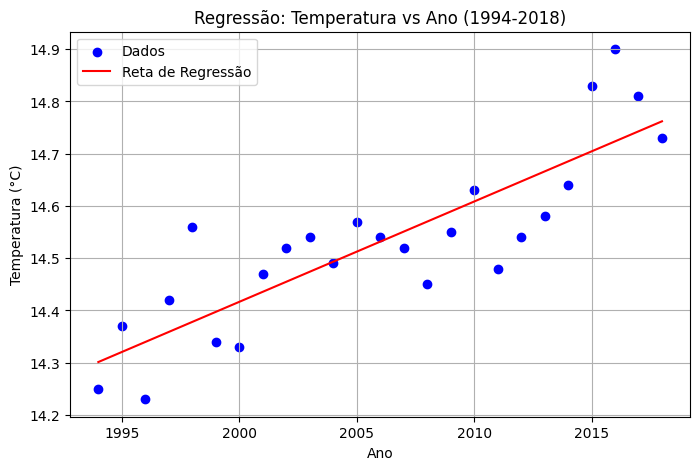

Equação da reta de regressão:
Temperatura = -23.9836 + 0.019200 * Ano
Coeficiente de correlação: 0.8460


In [ ]:
a_reg, b_reg = regressao(anos, temperaturas)
correlacao_val = r(anos, temperaturas)

# Plot do gráfico
plt.figure(figsize=(8, 5))
plt.scatter(anos, temperaturas, color="blue", label="Dados")
x_line = np.linspace(anos.min(), anos.max(), 100)
y_line = a_reg + b_reg * x_line
plt.plot(x_line, y_line, color="red", label="Reta de Regressão")
plt.xlabel("Ano")
plt.ylabel("Temperatura (°C)")
plt.title("Regressão: Temperatura vs Ano (1994-2018)")
plt.legend()
plt.grid(True)
plt.show()

# Resultados
print("Equação da reta de regressão:")
print("Temperatura = {:.4f} + {:.6f} * Ano".format(a_reg, b_reg))
print("Coeficiente de correlação: {:.4f}".format(correlacao_val))

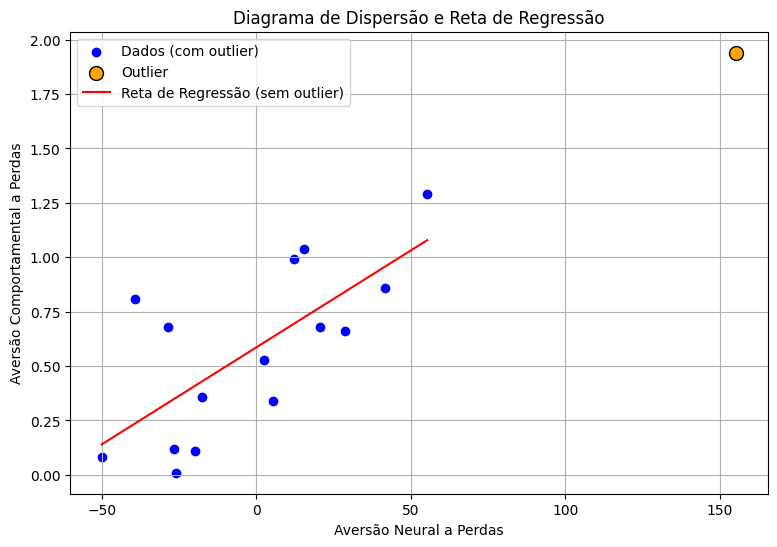

Equação da reta de regressão (sem outlier):
y = 0.5858 + 0.0089 x

Coeficiente de correlação com outlier: 0.8486
Coeficiente de correlação sem outlier: 0.7015


In [ ]:
x = np.array([-50.0, -39.1, -25.9, -26.7, -28.6, -19.8, -17.6, 5.5,
     2.6, 20.7, 12.1, 15.5, 28.8, 41.7, 55.3, 155.2])
y = np.array([0.08, 0.81, 0.01, 0.12, 0.68, 0.11, 0.36, 0.34,
     0.53, 0.68, 0.99, 1.04, 0.66, 0.86, 1.29, 1.94])

outlier_index = 15

x_no_out = np.delete(x, outlier_index)
y_no_out = np.delete(y, outlier_index)

a_reg, b_reg = regressao(x_no_out, y_no_out)

r_completo = r(x, y)
r_sem_outlier = r(x_no_out, y_no_out)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color="blue", label="Dados (com outlier)")
# destacar o outlier:
plt.scatter(x[outlier_index], y[outlier_index], color="orange", s=100, edgecolor="black", label="Outlier")

# reta de regressão sem o outlier
x_line = np.linspace(x_no_out.min(), x_no_out.max(), 100)
y_line = a_reg + b_reg * x_line
plt.plot(x_line, y_line, color="red", label="Reta de Regressão (sem outlier)")

plt.xlabel("Aversão Neural a Perdas")
plt.ylabel("Aversão Comportamental a Perdas")
plt.title("Diagrama de Dispersão e Reta de Regressão")
plt.legend()
plt.grid(True)
plt.show()

print("Equação da reta de regressão (sem outlier):")
print("y = {:.4f} + {:.4f} x".format(a_reg, b_reg))
print("\nCoeficiente de correlação com outlier: {:.4f}".format(r_completo))
print("Coeficiente de correlação sem outlier: {:.4f}".format(r_sem_outlier))
